## Windowed RQA

In other sections of this tutorial, like [Categorical RQA](rqaCategorical.ipynb) and [Continuous RQA](rqaContinuous.ipynb), you can learn how to run RQA on categorical and continuous time series data. In this section, we'll focus on performing a windowed version of RQA. This allows you to assess changes in recurrence over the course of a time series. By breaking the time series down into smaller overlapping segments (or 'windows') you can capture changes in the system's behaviour that a full time-series analysis might miss.

#### Selecting the Window Size and Overlap

To perform windowed RQA, we need to select the following:
- Window size: This specifies the number of samples you wish to include in each window. 
- Overlap: This is the degree of overlap between windows, often expressed as a percentage (e.g., 50% overlap). 

#### Let's Practice Windowed RQA

Before we begin, we need to import and load various packages and utilities. These will allow us to import the data, manipulate it, run the RQA analysis, and create visualizations to explore our results.

The code below will do all the setup for you. Simply click the "play" button on the left to run the code, and we'll be ready to start our analysis. 

In [2]:
import os
import pandas as pd
from utils import filter_data, interpolate_missing_data
from utils.rqa_utils import perform_rqa
from utils.plot_utils import plot_ts_and_rqa, plot_rqa_multi_radii, plot_windowed_ts_and_rqa

C:\Users\MQ20188409\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pytools\persistent_dict.py:59: UserWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


Now that all the utilities are loaded, it's time to apply RQA to some real data—in this case, [acceleration data from a person walking](data/rqaContinuous/walkerAfriend.txt).

Let's select an appropriate window size. The acceleration data was sampled at 50 Hz (i.e., 50 times per second) and the time series is 10 minutes long (i.e., 30.000 samples in total). Let's set a window size of 1 minute (i.e., 3000 samples). We'll set the overlap to 50%, so that each window overlaps by 30s. 

Click the "play" button below to perform the analysis and generate the visualisations.

Loading file: walkerAfriend.txt


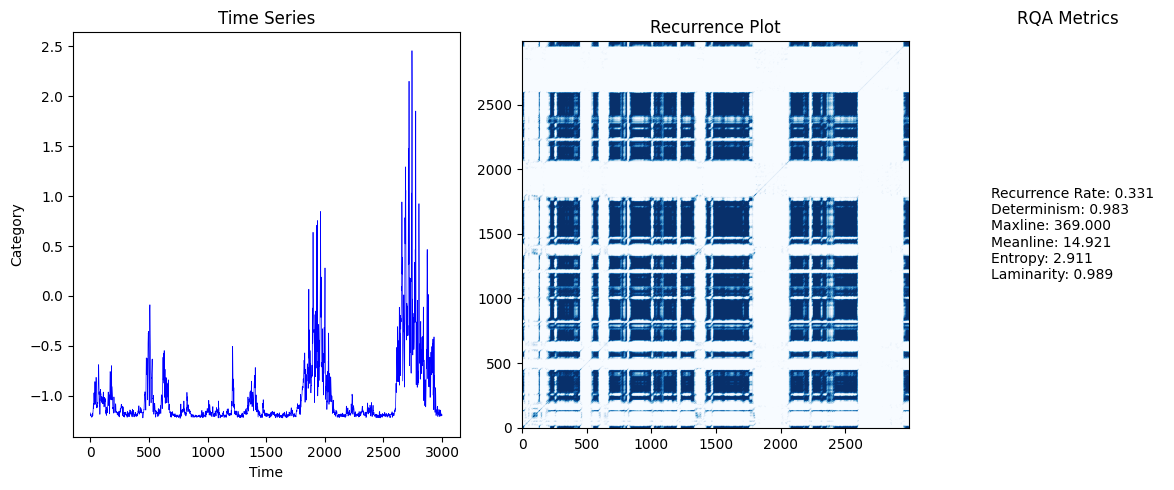

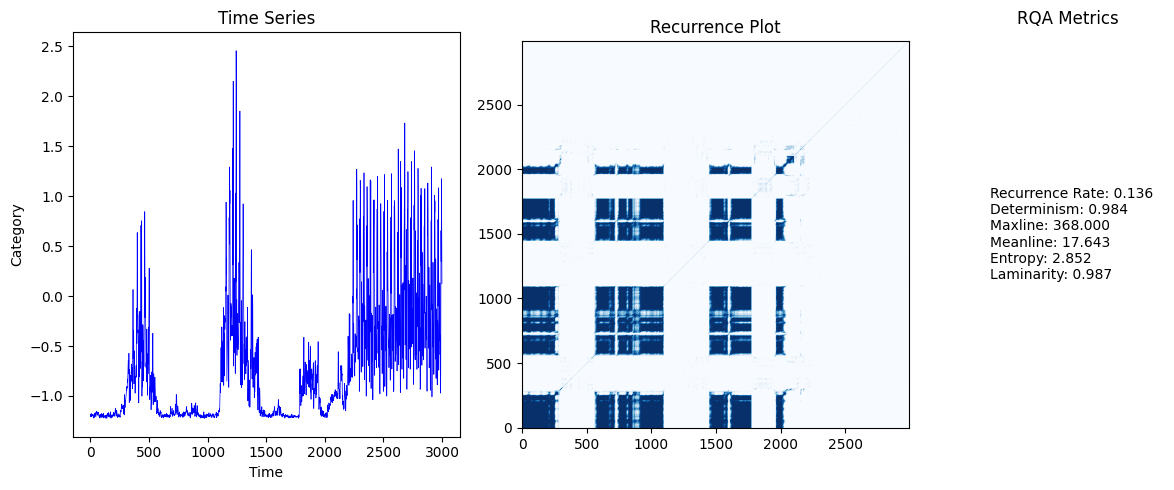

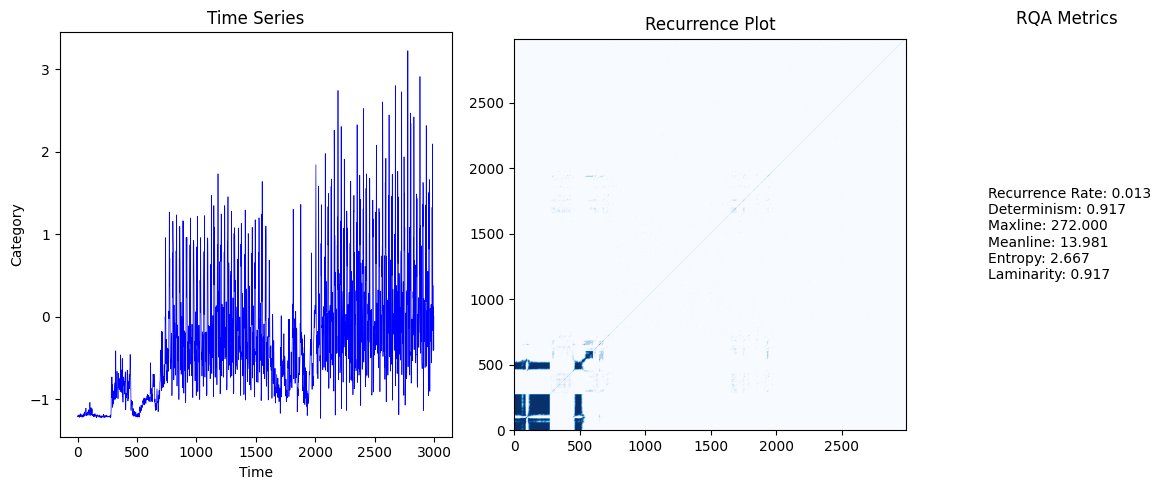

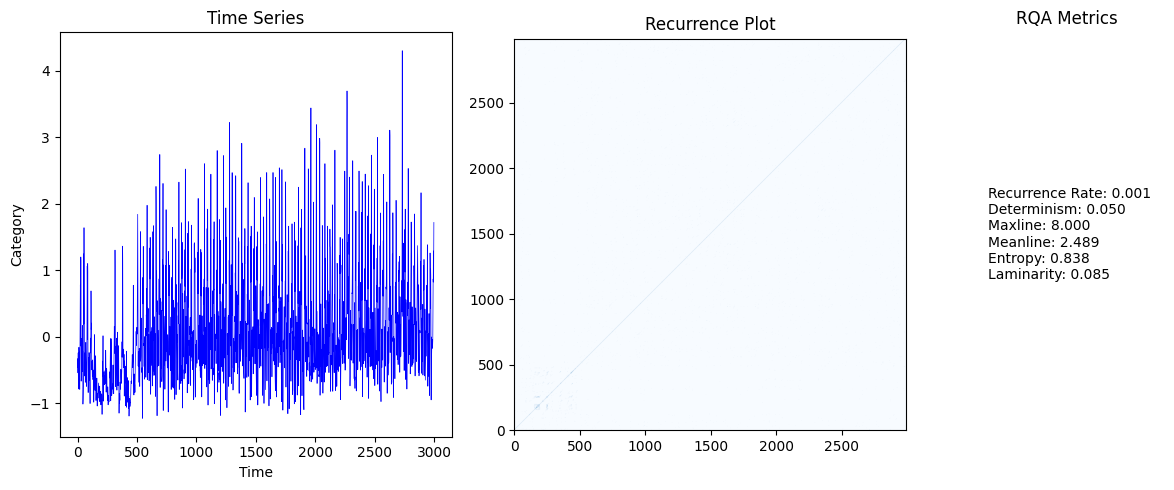

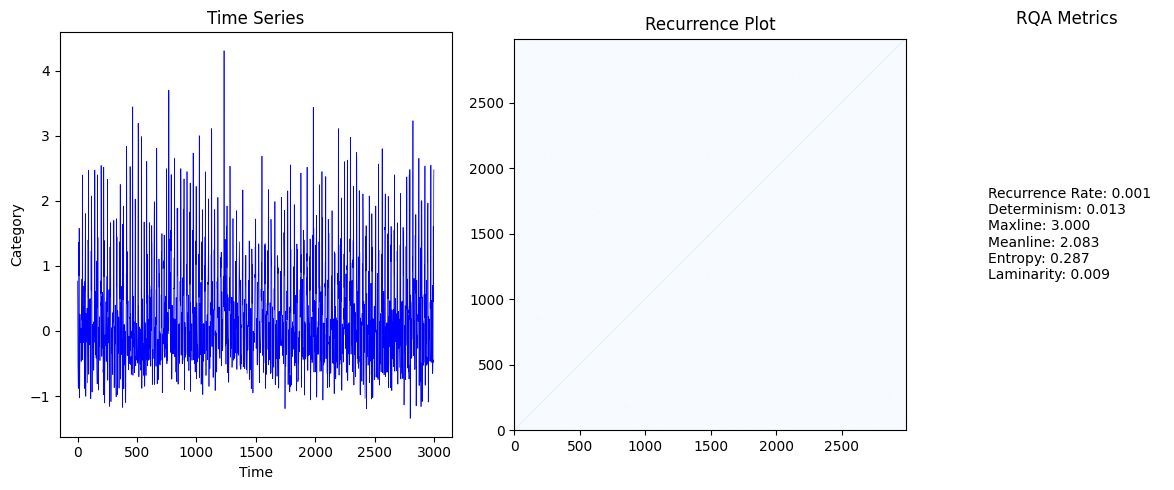

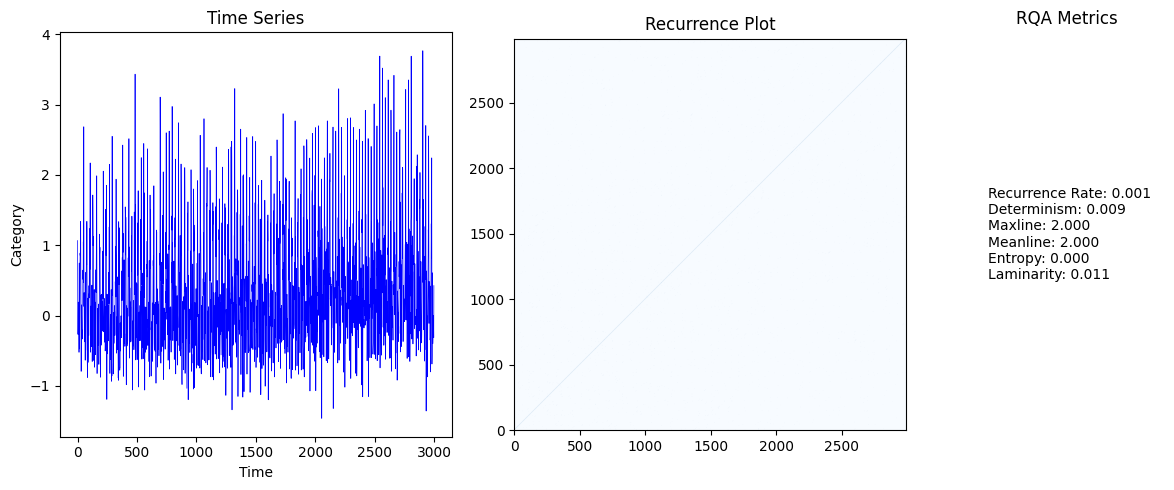

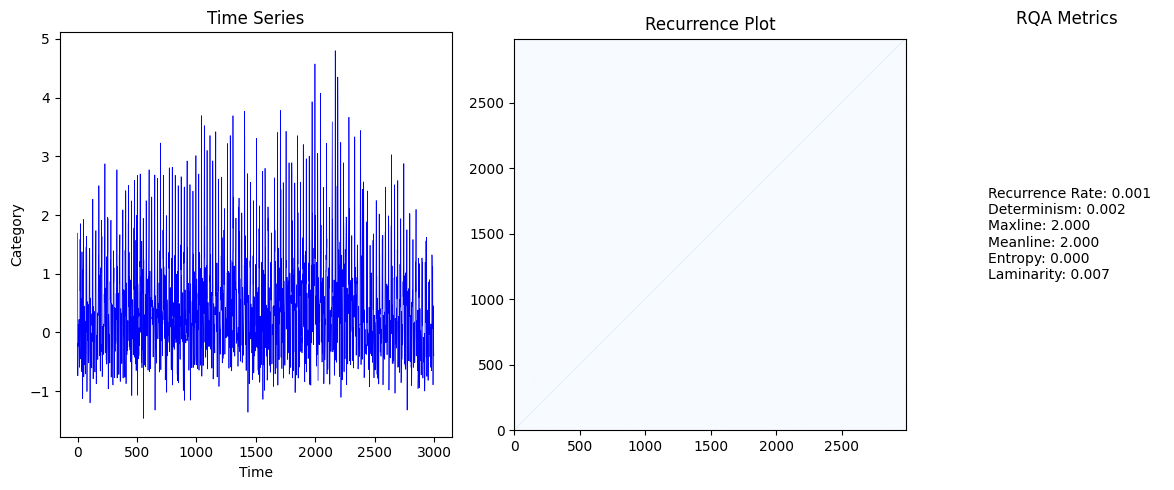

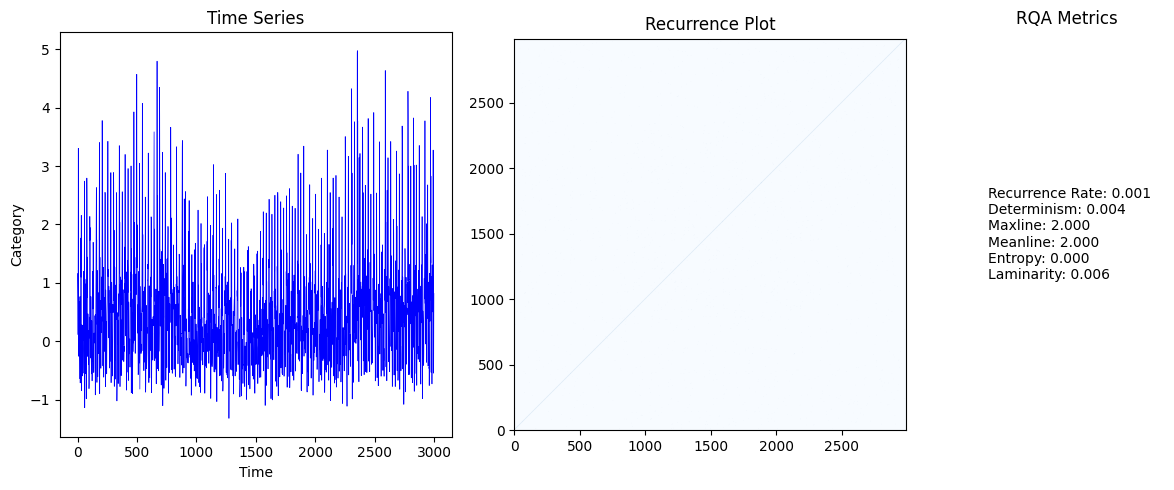

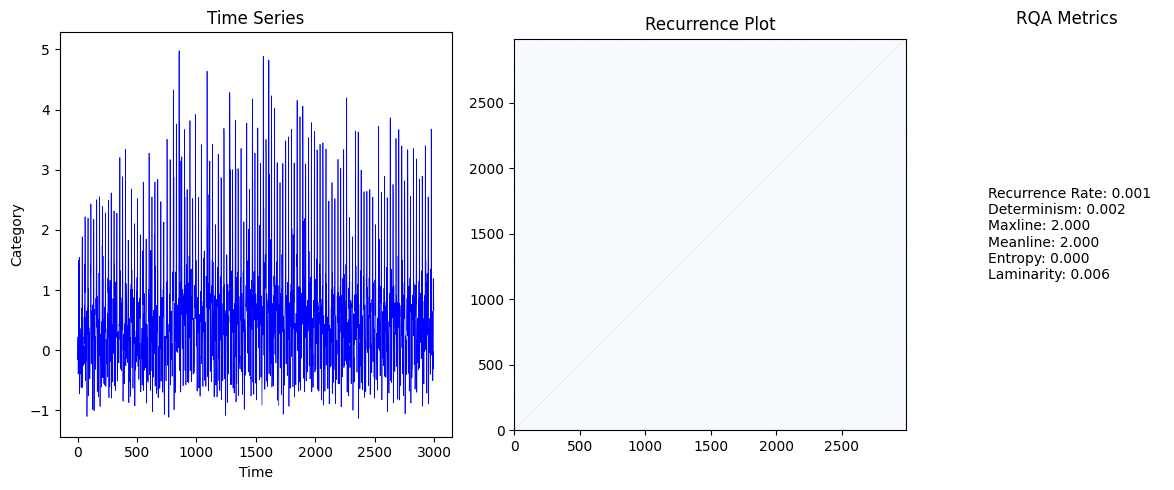

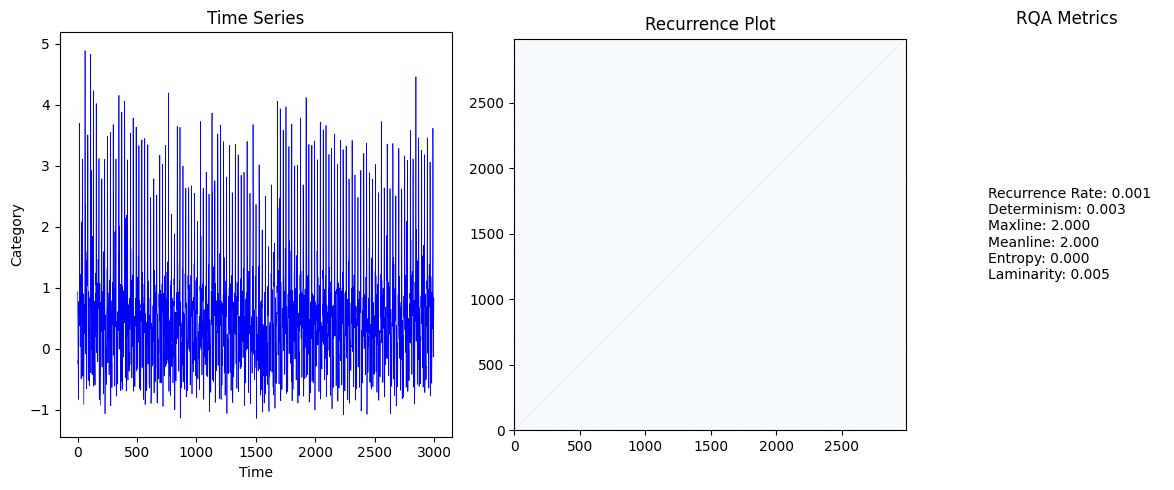

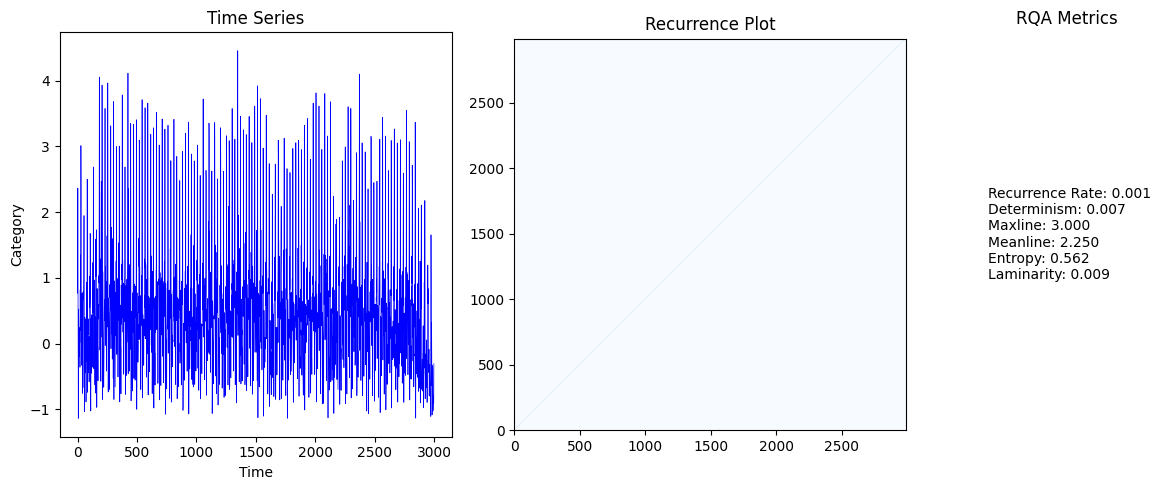

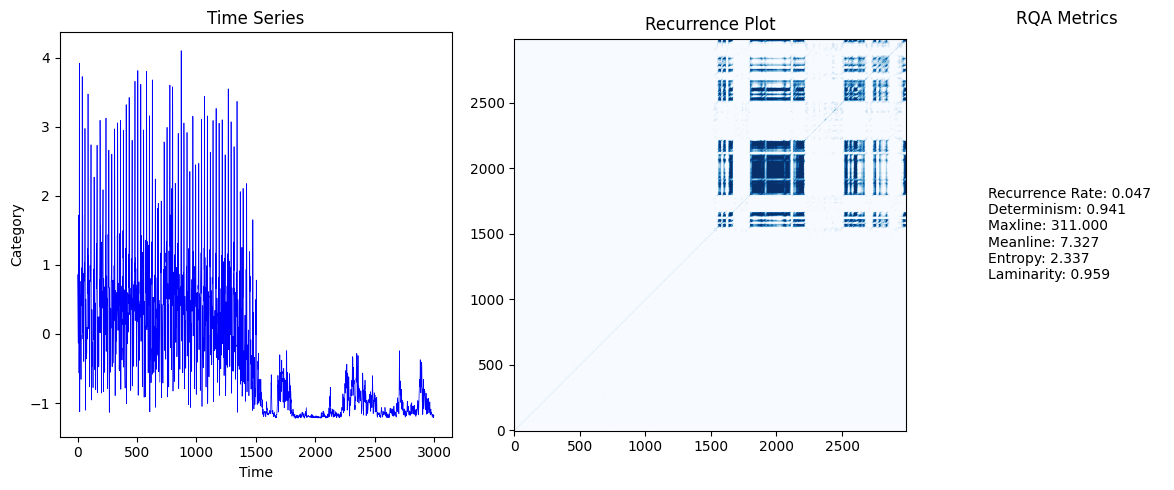

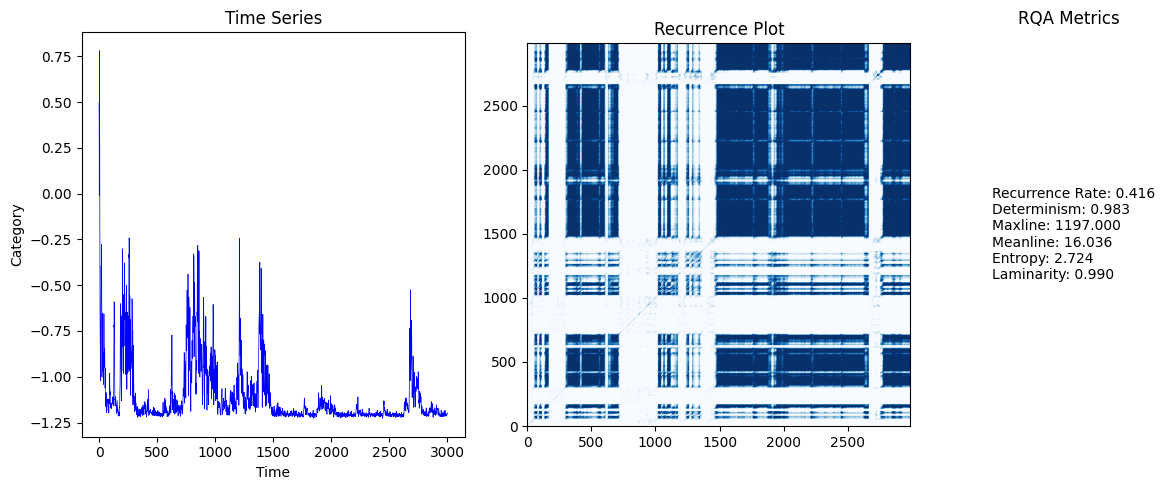

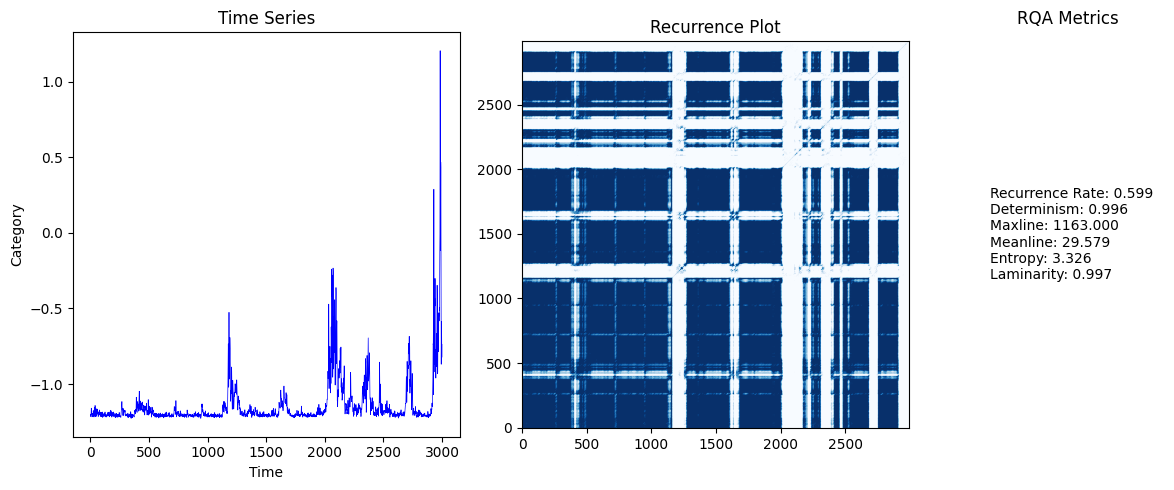

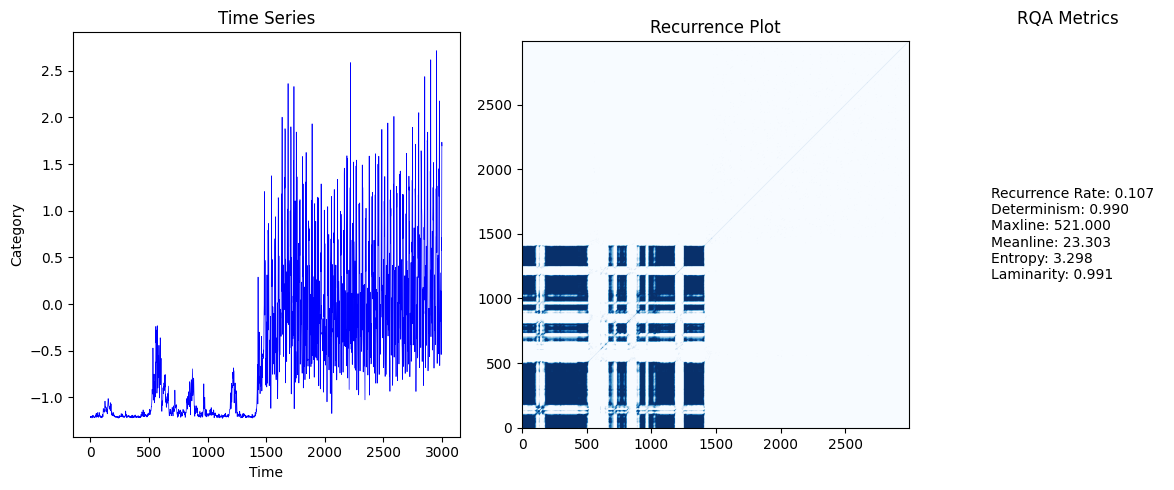

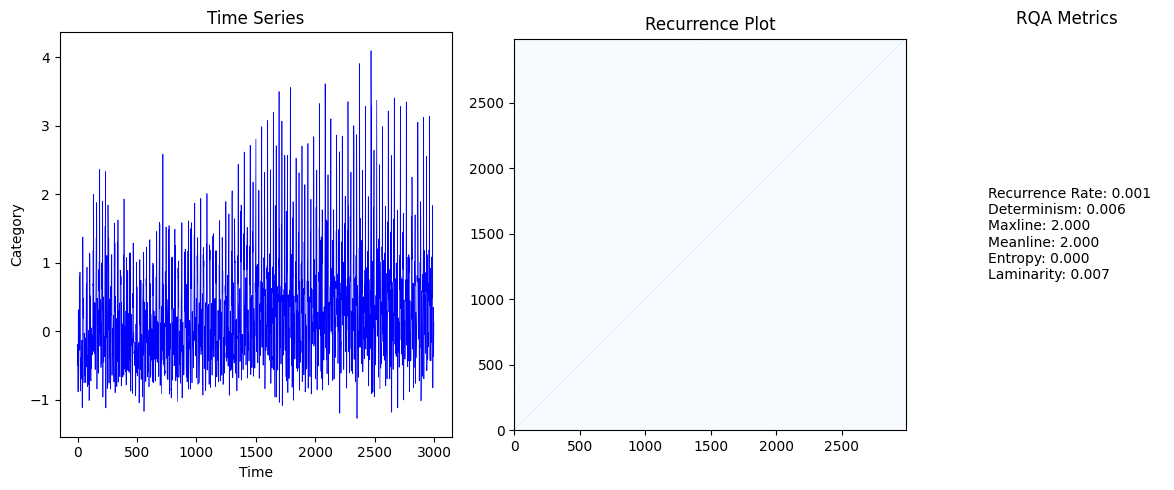

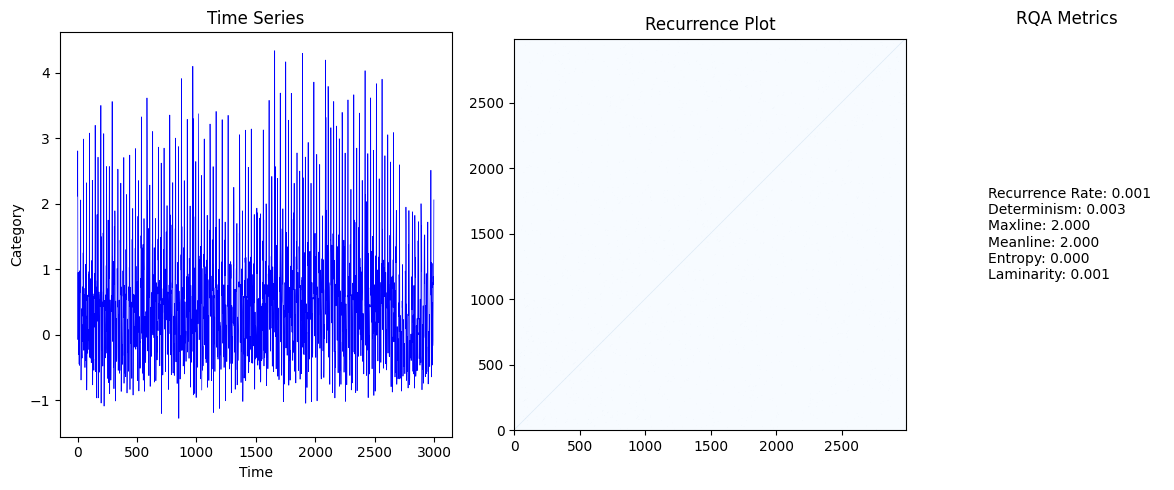

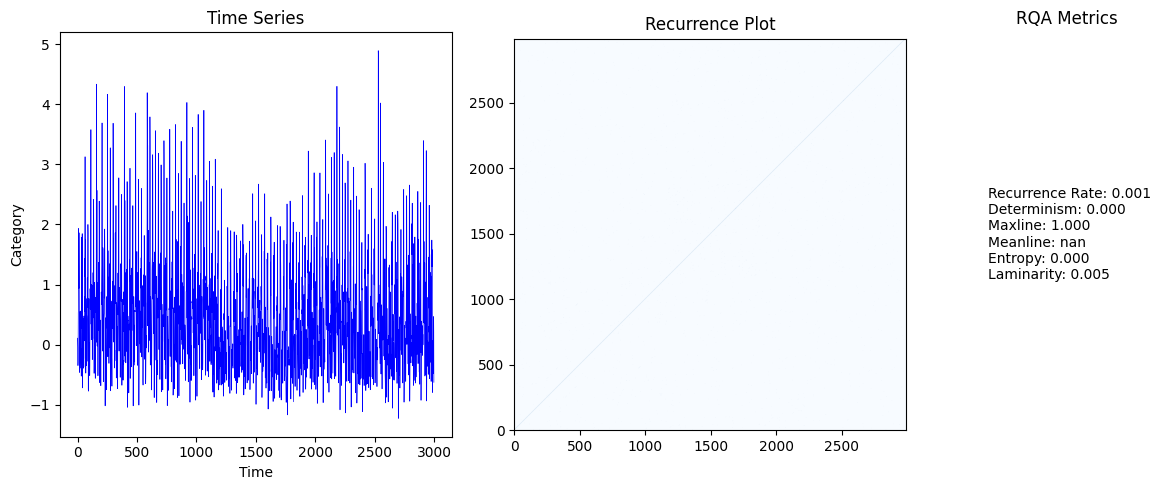

Windowed RQA analysis and plotting completed successfully!


In [4]:
# First set the directory path for the data
data_directory = "data/rqaContinuous/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file name for the data
file_name = "walkerAfriend.txt"
file_path = os.path.join(data_directory, file_name)

# RQA parameters
rqa_params = {
    'delay': 5,
    'embedding_dimension': 3,
    'radius': 0.3,
    'minLine': 2,
    'getRP': True
}

# Windowed analysis parameters
sample_rate = 50  # Hz
window_size_seconds = 60  # seconds
window_size_samples = window_size_seconds * sample_rate
overlap = 0.5  # 50% overlap
step_size = int(window_size_samples * (1 - overlap))

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path, header=None)

    # Assume the data is a single unnamed column
    continuous_data = data.iloc[:, 0].to_frame()

    # Interpolate any missing data that might be present in the file
    continuous_data = interpolate_missing_data(continuous_data)

    # Apply a filter to the data
    continuous_data = filter_data(continuous_data)
    
    # Normalise the data by using a z-score
    continuous_data = (continuous_data - continuous_data.mean()) / continuous_data.std()

    # Perform windowed RQA
    num_samples = len(continuous_data)
    for start in range(0, num_samples - window_size_samples + 1, step_size):
        end = start + window_size_samples
        window_data = continuous_data[start:end]

        # Perform RQA using perform_rqa function from rqa_utils
        rqa_results, rp_results = perform_rqa(window_data, **rqa_params)

        # Print RQA results
        # Create RQA metrics dictionary
        for column, result in rqa_results.items():
            rqa_metrics = {
                'Recurrence Rate': result.recurrence_rate,
                'Determinism': result.determinism,
                'Maxline': result.longest_diagonal_line,
                'Meanline': result.average_diagonal_line,
                'Entropy': result.entropy_diagonal_lines,
                'Laminarity': result.laminarity,
            }

        # Plot time series and recurrence plot side-by-side
        plot_ts_and_rqa(window_data[0].values, rp_results[0].recurrence_matrix, rqa_metrics, save_image, f'images/rqa/{file_name}_window_{start}_to_{end}_combined_plot.png')
    
    print('Windowed RQA analysis and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')

#### Interpreting the Results

If your code ran successfully, you should see the following RQA metrics for the data:

- %REC: 2.4% - This value tells us how often the system returns to a previous state, providing insight into the recurrence within the individual's walking dynamics. Higher recurrence values indicate more frequent returns to similar acceleration values.
- %DET: 97.2% - This represents the proportion of recurrence points that form diagonal lines, reflecting the predictability of the walking pattern.
- Maxline: 1187 - This metric identifies the longest sequence of recurring acceleration patterns, showing the longest period over which the individual maintained a stable acceleration pattern.
- Meanline: 13.9 - This is the average length of diagonal lines in the recurrence plot, giving us insight into the typical duration for which the walking dynamics remain consistent.

Our walker was walking with a [friend](data/rqaContinuous/walkerBfriend.txt). Let's see how the RQA metrics above compare to the friend's acceleration data. Click "play" on the code chunk below to run the RQA on both the original walker and their friend, and observe the differences.

Loading file: sin.txt


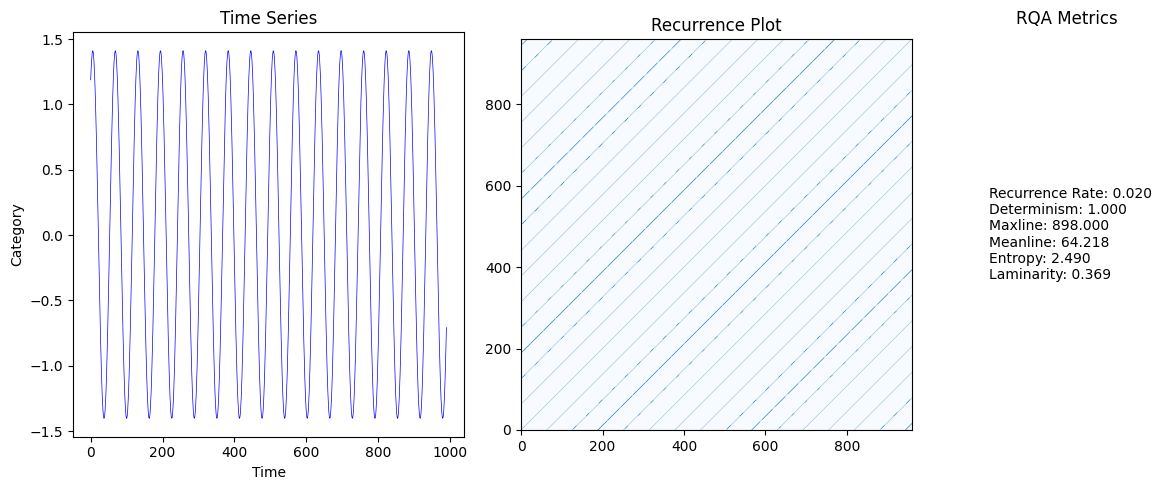

RQA analysis and plotting completed successfully!
Loading file: white.txt


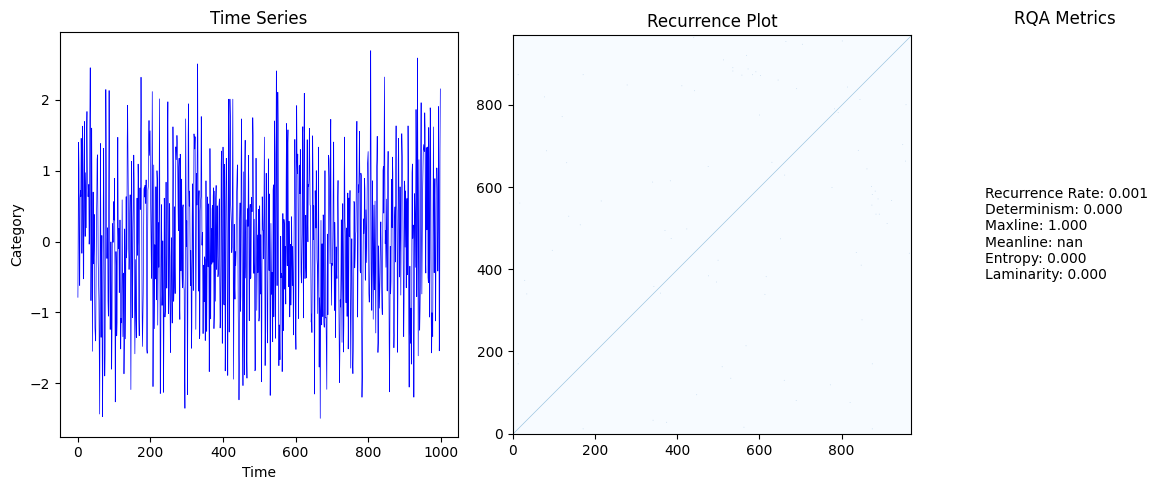

RQA analysis and plotting completed successfully!


In [6]:
# First set the directory path for the data
data_directory = "data/rqaContinuous/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file names for the data
file_names = ["walkerAfriend.txt", "walkerBfriend.txt"]

file_path = os.path.join(data_directory, file_name)

# Set RQA parameters
rqa_params = {
    'delay': 15,
    'embedding_dimension': 3,
    'radius': 0.1,
    'minLine': 2,
    'getRP': True
}

# Loop through each file and perform RQA
for file_name in file_names:
    file_path = os.path.join(data_directory, file_name)

    # Check if the file exists
    if os.path.exists(file_path):
        print(f'Loading file: {file_name}')

        # Load the file into a DataFrame
        data = pd.read_csv(file_path, header=None)

        # Assume the data is a single unnamed column
        continuous_data = data.iloc[:, 0].to_frame()

        # Interpolate any missing data that might be present in the file
        continuous_data = interpolate_missing_data(continuous_data)

        # Apply a filter to the data
        continuous_data = filter_data(continuous_data)
    
        # Normalise the data by using a z-score
        continuous_data = (continuous_data - continuous_data.mean()) / continuous_data.std()

        # Perform RQA using perform_rqa function from rqa_utils
        rqa_results, rp_results = perform_rqa(continuous_data, **rqa_params)

        # Print RQA results
        # Create RQA metrics dictionary
        for column, result in rqa_results.items():
            rqa_metrics = {
                'Recurrence Rate': result.recurrence_rate,
                'Determinism': result.determinism,
                'Maxline': result.longest_diagonal_line,
                'Meanline': result.average_diagonal_line,
                'Entropy': result.entropy_diagonal_lines,
                'Laminarity': result.laminarity,
            }

        # Plot time series and recurrence plot side-by-side
        plot_ts_and_rqa(continuous_data[0].values, rp_results[0].recurrence_matrix, rqa_metrics, save_image, f'images/rqa/{file_name}_combined_plot.png')
        
        print('RQA analysis and plotting completed successfully!')
    else:
        print(f'File {file_name} not found in directory {data_directory}')

#### Comparing the Results

If you examine the recurrence plots (RPs) and the resulting RQA metrics, you'll notice that the second walker shows less recurrent activity than the first. There are less blue lines in the second plot, and the RQA metrics are lower. This indicates less repetition (%REC) and less predictability (%DET) in the walking pattern for the second walker.

#### Changing the Radius

In the previous code, we used the following parameters:
- Time delay: 15
- Embedding dimension: 3
- Radius = 0.1

The time delay and the embedding dimension were selected using an average mutual information (AMI) analysis, and a false nearest neighbors (FNN) analysis. See the relevant analysis scripts, [ami.ipynb](ami.ipynb) and [fnn.ipynb](fnn.ipynb), for more information on selecting these.

Recall that the radius determines how close two states must be in phase space to be considered recurrent. Adjusting the radius therefore allows us to control the sensitivity of detecting recurrences. 

Let’s run RQA on the first walker again, this time using a range of radii: 0.1, 0.2, and 0.5. Observe how changing the radius influences the recurrence plot and the resulting metrics, such as %REC and %DET.

Click "play" to execute the code below and examine how the results differ for each radius.

Loading file: walkerAfriend.txt
Running RQA with radius: 0.1
Running RQA with radius: 0.2
Running RQA with radius: 0.5


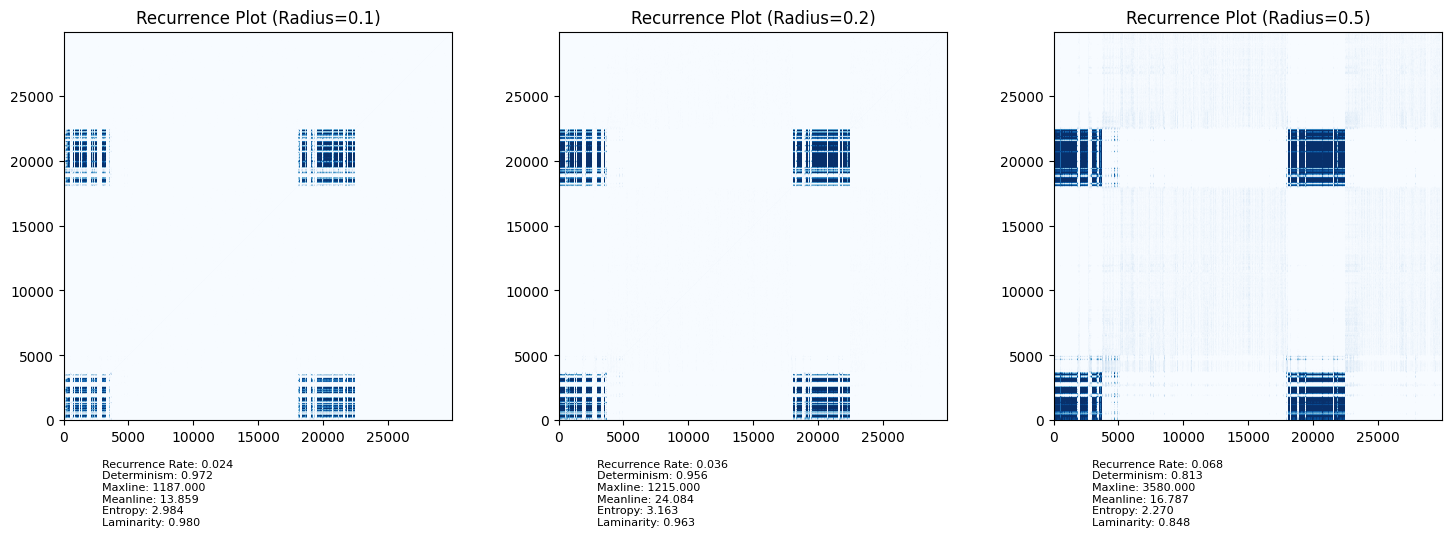

RQA analysis and plotting completed successfully!


In [5]:
# First set the directory path for the data
data_directory = "data/rqaContinuous/"

# Then decide whether you'd like to save the plots 
# These are saved in "images/rqa"
save_image = True

# Set the file name for the data
file_name = "walkerAfriend.txt"
file_path = os.path.join(data_directory, file_name)

# Set RQA parameters
rqa_params = {
    'delay': 15,
    'embedding_dimension': 3,
    'minLine': 2,
    'getRP': True
}

# Define radii to test
radii = [0.1, 0.2, 0.5]

# Check whether the file containing the data exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_path, header=None)

    # Assume the data is a single unnamed column
    continuous_data = data.iloc[:, 0].to_frame()

    # Interpolate any missing data that might be present in the file
    continuous_data = interpolate_missing_data(continuous_data)

    # Apply a filter to the data
    continuous_data = filter_data(continuous_data)
    
    # Normalise the data by using a z-score
    continuous_data = (continuous_data - continuous_data.mean()) / continuous_data.std()

    # Loop through each radius value and perform RQA
    rp_results_list = []
    rqa_metrics_list = []
    for radius in radii:
        print(f'Running RQA with radius: {radius}')
        rqa_params['radius'] = radius

        # Perform RQA using perform_rqa function from rqa_utils
        rqa_results, rp_results = perform_rqa(continuous_data, **rqa_params)

        # Create RQA metrics dictionary
        for column, result in rqa_results.items():
            rqa_metrics = {
                'Recurrence Rate': result.recurrence_rate,
                'Determinism': result.determinism,
                'Maxline': result.longest_diagonal_line,
                'Meanline': result.average_diagonal_line,
                'Entropy': result.entropy_diagonal_lines,
                'Laminarity': result.laminarity,
            }
            rqa_metrics_list.append(rqa_metrics)
            rp_results_list.append(rp_results[0].recurrence_matrix)

    # Plot recurrence plots and metrics for different radii
    plot_rqa_multi_radii(rp_results_list, rqa_metrics_list, radii, save_image, f'images/rqa/{file_name}_multi_radii_plot.png')
    
    print('RQA analysis and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')

#### Selecting the Optimal Radius

When selecting a radius, best practice involves using a range of values and choosing the one that yields a reasonable set of %REC values for biological systems (typically between 0.5% and 5%). In this case, the best radius for our walking data appears to be 0.1, which yields a %REC value of 2.4%. 

In real datasets, it is important to evaluate whether the distribution of RQA metrics changes significantly across different settings. Although the absolute values of the RQA metrics may vary (e.g., %REC will increase as the radius increases), the overall distribution across the dataset should remain generally consistent. This consistency can give you confidence that your parameters are appropriate.

#### Going Further

To expand your understanding of continuous RQA, you can try the following:

1. Analyse other time series: Repeat the analyses above with other types of continuous data such as a [sine wave](data/rqaContinuous/sin.txt) or [white noise](data/rqaContinuous/white.txt). 
2. Experiment with other parameters: Previously, we experimented with different radii values. Now, try adjusting the time delay or embedding dimension to see how these parameters impact the recurrence plots and RQA metrics.
3. Learn how to select an appropriate delay and embedding dimension: Head over to [ami.ipynb](ami.ipynb) or [fnn.ipynb](fnn.ipynb) within this tutorial to learn more about setting the hyperparameters required for continuous RQA.
4. Run a windowed RQA: To assess how recurrence patterns change over time, explore [rqaWindowed.ipynb](rqaWindowed.ipynb) which walks you through performing windowed RQA.

In [ ]:
# Set the directory path for the continuous data
data_directory = "data/rqaContinuous/"

# Save image or not
save_image = True  # Set to True to save plots as images

# Set the file name for continuous data
file_name = "b1000.txt"
file_path = os.path.join(data_directory, file_name)

# RQA parameters for continuous data
rqa_params = {
    'delay': 15,
    'embedding_dimension': 3,
    'radius': 0.1,
    'minLine': 2,
    'getRP': True
}

# Set the frame rate and window size in seconds
fps = 10
window_size_seconds = 60  # Set window size in seconds
window_size = int(window_size_seconds * fps)  # Calculate window size in frames
overlap = 0.5  # 50% overlap
step_size = int(window_size * (1 - overlap))  # Step size for windows

# Check if the file exists
if os.path.exists(file_path):
    print(f'Loading file: {file_name}')

    # Load the TXT file into a DataFrame
    data = pd.read_csv(file_path, header=None)

    # Assume the data is a single unnamed column
    continuous_data = data.iloc[:, 0]

    # Convert the series to a DataFrame to maintain consistency with filter_data function
    continuous_data = continuous_data.to_frame()

    # Iterate over the data in windows with 50% overlap
    for start in range(0, len(continuous_data) - window_size + 1, step_size):
        print(f'Processing window starting at {start}')

        # Get the window of data
        window = continuous_data[start:start + window_size]

        # Interpolate missing data
        window = interpolate_missing_data(window)

        # Filter the data
        window = filter_data(window)
        
        # Z-score normalization
        window = (window - window.mean()) / window.std()

        # Perform RQA on the window
        rqa_results, rp_results = perform_rqa(window, **rqa_params)

        # Plot time series and recurrence plot side-by-side
        plot_windowed_ts_and_rqa(window.iloc[:, 0].values, rp_results[0].recurrence_matrix, save_image, f'images/rqa/{file_name}_window_{start}_combined_plot.png')

        # Print specific RQA results
        for column, result in rqa_results.items():
            print(f'RQA results for column {column}:')
            print(f'Recurrence Rate: {result.recurrence_rate}')
            print(f'Determinism: {result.determinism}')
            print(f'Maxline: {result.longest_diagonal_line}')
            print(f'Meanline: {result.average_diagonal_line}')
            print(f'Entropy: {result.entropy_diagonal_lines}')
            print(f'Laminarity: {result.laminarity}')
    
    print('Windowed RQA analysis and plotting completed successfully!')
else:
    print(f'File {file_name} not found in directory {data_directory}')